In [2]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import read_player_stats
import training_data
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import grid_search
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 1000

In [13]:
#read in rb data for all seasons
total_df = training_data.make_total_data(seasons=range(2004,2015), pages=[0,1,2,3])
#training samples
train_df = training_data.make_training_df(total_df, seasons=range(2004,2013), ppg=True)

In [14]:
#train on points per game
X_train = np.array(train_df.drop(['Name','FFPPG'], axis=1))
y_train = np.array(train_df['FFPPG'])

#rf model
#model = RandomForestRegressor(n_estimators=500)
#model.fit(X_train, y_train)

#linear regression
parameters = {'alpha': np.logspace(-10,10,num=20)}
model = grid_search.GridSearchCV(linear_model.Ridge(), parameters, cv=10)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.12884e-09,   1.27427e-08,   1.43845e-07,
         1.62378e-06,   1.83298e-05,   2.06914e-04,   2.33572e-03,
         2.63665e-02,   2.97635e-01,   3.35982e+00,   3.79269e+01,
         4.28133e+02,   4.83293e+03,   5.45559e+04,   6.15848e+05,
         6.95193e+06,   7.84760e+07,   8.85867e+08,   1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [15]:
model = model.best_estimator_

In [16]:
eval_df = training_data.make_training_df(total_df, seasons=range(2012,2015), ppg=True)
X_eval = np.array(eval_df.drop(['Name','FFPPG'], axis=1))

y_eval = model.predict(X_eval) #predict 2014 stats

In [17]:
#compare
pred_summary = eval_df[['Name']]
pred_summary['Predicted'] = y_eval
actual = total_df[total_df.Season == 2014]
actual = actual[['Name','FFPPG']]
pred_summary = pd.merge(pred_summary, actual, on='Name', how='inner')

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [18]:
pred_summary

,Name,Predicted,FFPPG
0,AdrianPeterson,13.494774,9.3
1,AhmadBradshaw,6.730249,12.1
2,AlfonsoSmith,2.786275,1.0
3,AlfredMorris,11.526553,10.7
4,AnthonyDixon,2.516996,4.6
5,AnthonySherman,2.569933,1.3
6,AntoneSmith,3.743144,6.7
7,ArianFoster,7.499178,18.1
8,BenTate,5.879449,6.1
9,BernardPierce,4.473344,3.8


In [19]:
pred_summary['Error'] =  pred_summary['FFPPG'] - pred_summary['Predicted']

In [20]:
ordered_pred = pred_summary.sort(columns='Error', ascending=False)
ordered_pred.set_index('Name', inplace=True)

In [21]:
top10 = ordered_pred[:10]
bottom10 = ordered_pred[-10:]

In [22]:
bottom10

,Predicted,FFPPG,Error
Name,,,
LeSeanMcCoy,14.846912,11.1,-3.746912
BilalPowell,6.118889,2.1,-4.018889
KnowshonMoreno,11.305256,7.2,-4.105256
AdrianPeterson,13.494774,9.3,-4.194774
DeAngeloWilliams,9.262276,4.4,-4.862276
ReggieBush,11.104875,6.1,-5.004875
ChrisJohnson,10.885634,5.8,-5.085634
CJSpiller,10.819941,5.4,-5.419941
DannyWoodhead,8.434893,2.4,-6.034893


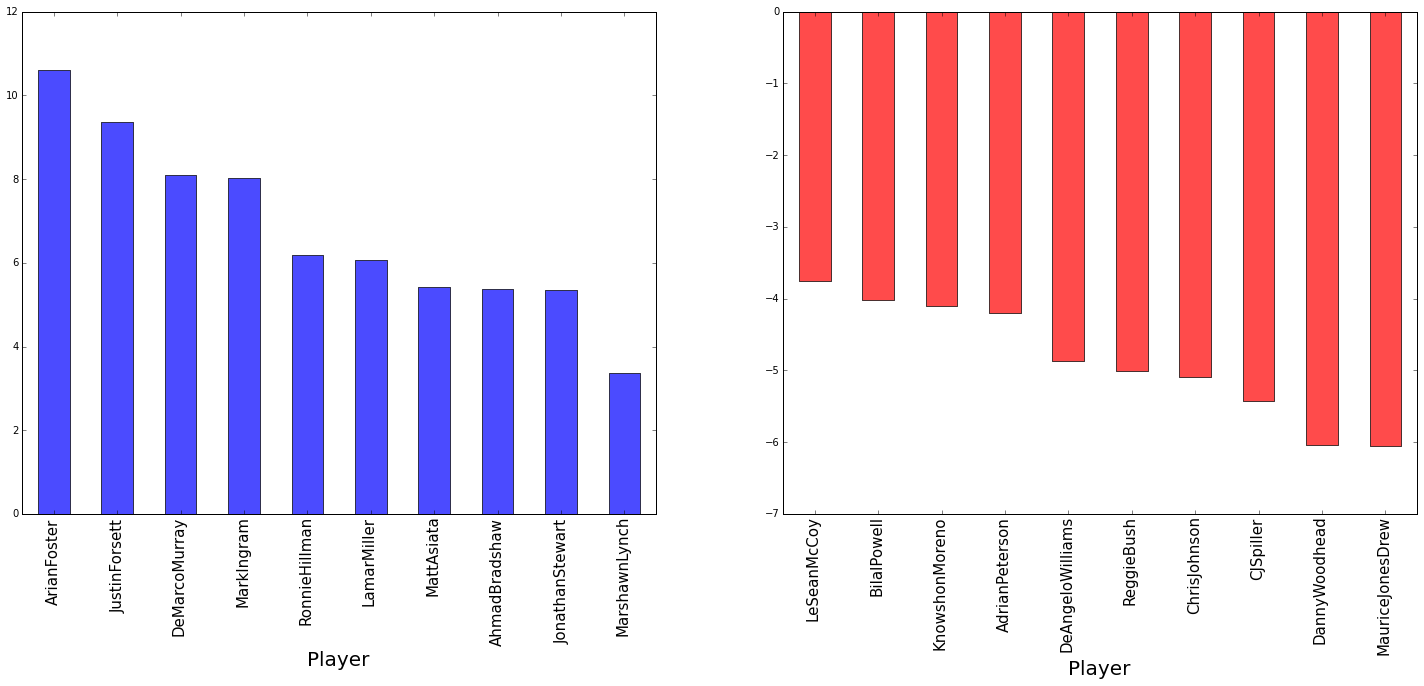

In [23]:
fig = plt.figure(figsize=(25,9))
p1 = fig.add_subplot(1,2,1)
p1.tick_params(axis='x', labelsize=15)
top10['Error'].plot(kind='bar', alpha=.7)
plt.xlabel('Player', fontsize=20)
p2 = fig.add_subplot(1,2,2)
p2.tick_params(axis='x', labelsize=15)
bottom10['Error'].plot(kind='bar', color='r', alpha=.7)
plt.xlabel('Player', fontsize=20)

In [24]:
#make 2015 projections
total_train = training_data.make_training_df(total_df, seasons=range(2004,2014), ppg=True)
most_rec_df = training_data.merge_seasons(total_df[total_df.Season == 2013], total_df[total_df.Season == 2014])

In [25]:
most_rec_df.dropna(inplace=True)

In [26]:
X_proj = np.array(most_rec_df.drop('Name', axis=1))

In [27]:
y_proj = model.predict(X_proj)

In [28]:
most_rec_df['2015 Projection'] = y_proj

In [29]:
#The projections
most_rec_df[['Name', '2015 Projection']].sort(columns='2015 Projection', ascending=False)

,Name,2015 Projection
47,DeMarcoMurray,15.778341
99,LeVeonBell,15.173803
103,MarshawnLynch,13.765294
105,MattForte,13.637217
98,LeSeanMcCoy,13.318867
70,JamaalCharles,13.153362
54,EddieLacy,12.362670
10,ArianFoster,11.677372
78,JoiqueBell,10.159459
4,AlfredMorris,10.124576
